In [28]:
# Data manipulation and analysis
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing
import nltk  # or use spaCy instead
# import spacy  # Uncomment if using spaCy

# Date and time operations
from datetime import datetime

# Useful for counting and grouping
from collections import Counter


In [29]:
df = pd.read_csv("../data/raw_analyst_ratings.csv", parse_dates=["date"])

# Ensure 'date' is datetime, coerce errors to NaT
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows where 'date' could not be parsed (optional)
df = df.dropna(subset=['date'])

# If 'date' is timezone-naive, localize to UTC; if already tz-aware, just convert
if df['date'].dt.tz is None:
    df['date'] = df['date'].dt.tz_localize('UTC').dt.tz_localize(None)
else:
    df['date'] = df['date'].dt.tz_convert('UTC').dt.tz_localize(None)


In [30]:
df['headline_length'] = df['headline'].str.len()
df['word_count'] = df['headline'].str.split().apply(len)
df['headline_length'].describe()


count    55987.000000
mean        80.015254
std         56.126094
min         12.000000
25%         42.000000
50%         63.000000
75%         91.000000
max        512.000000
Name: headline_length, dtype: float64

<Axes: ylabel='publisher'>

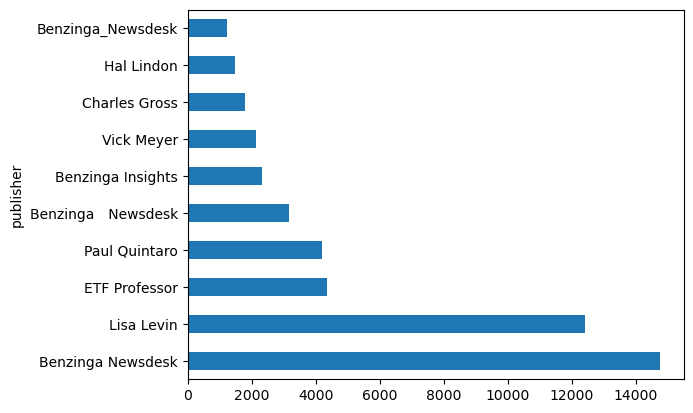

In [31]:
df['publisher'].value_counts().head(10).plot(kind='barh')


<Axes: title={'center': 'Articles per Day'}, xlabel='date_only'>

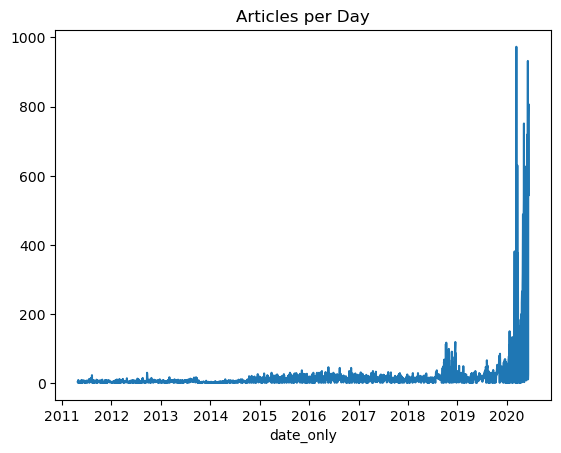

In [32]:
df['date_only'] = df['date'].dt.date
daily_counts = df.groupby('date_only').size()
daily_counts.plot(title="Articles per Day")


In [33]:


vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['headline'])
keywords = vectorizer.get_feature_names_out()

# Use PCA/kmeans or LDA later for topic modeling


<Axes: title={'center': 'Articles by Hour of Day'}, xlabel='hour'>

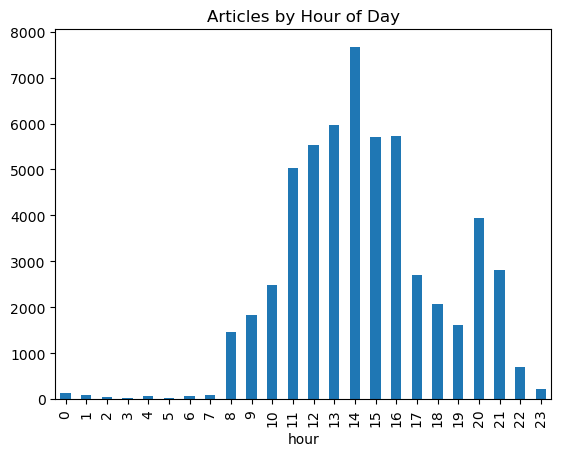

In [34]:
df['hour'] = df['date'].dt.hour
df['hour'].value_counts().sort_index().plot(kind='bar', title="Articles by Hour of Day")


In [35]:
threshold = daily_counts.mean() + 2 * daily_counts.std()
spikes = daily_counts[daily_counts > threshold]
print(spikes)


date_only
2020-02-27    275
2020-02-28    381
2020-03-06    281
2020-03-11    282
2020-03-12    973
2020-03-19    630
2020-03-23    376
2020-03-24    160
2020-04-09    164
2020-04-13    184
2020-04-15    186
2020-04-16    199
2020-04-17    194
2020-04-20    181
2020-04-21    232
2020-04-22    246
2020-04-23    265
2020-04-24    246
2020-04-27    283
2020-04-28    317
2020-04-29    449
2020-04-30    488
2020-05-01    385
2020-05-04    347
2020-05-05    478
2020-05-06    529
2020-05-07    751
2020-05-08    508
2020-05-11    485
2020-05-12    388
2020-05-13    549
2020-05-14    536
2020-05-15    322
2020-05-18    547
2020-05-19    332
2020-05-20    461
2020-05-21    333
2020-05-22    286
2020-05-26    628
2020-05-27    492
2020-05-28    465
2020-05-29    309
2020-06-01    484
2020-06-02    361
2020-06-03    720
2020-06-04    538
2020-06-05    932
2020-06-08    765
2020-06-09    803
2020-06-10    807
2020-06-11    544
dtype: int64


<Axes: title={'center': 'Top Domains by Count'}, ylabel='domain'>

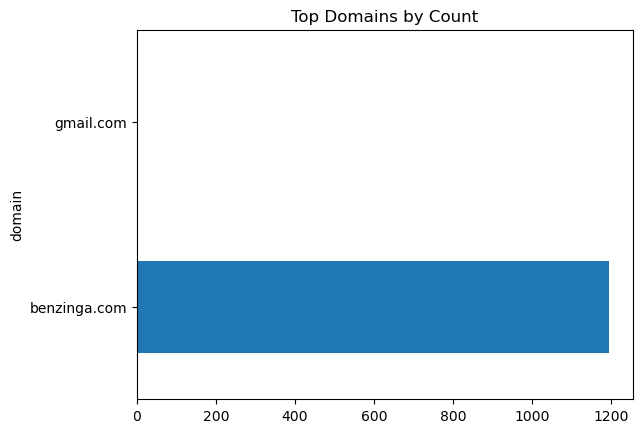

In [36]:
top_publishers = df['publisher'].value_counts().head(5)
df['domain'] = df['publisher'].str.extract(r'@([\w\.-]+)')
domain_counts = df['domain'].value_counts()
domain_counts.head(10).plot(kind='barh', title="Top Domains by Count")